# Household Income Analysis

# Objective 

The objective of this project is to build a clear and reliable regression model to predict household income using socio-economic and demographic factors. The model will help identify the main factors that affect income, offer useful insights for policymakers, and support efforts to reduce income inequality through data-driven strategies.

# Reasons
* The first reason is to pinpoint the factors that significantly impact household income. By analyzing variables such as age, work experience, household size, education level, and employment status, the model seeks to reveal the key determinants of income variation. 

* The second reason is  to enable the prediction of income levels for individuals or households based on their characteristics and gain insights into the financial standing of different households.

* The third reasin is to uncover demographic patterns by examining variables like household size and the number of dependents. This analysis helps in understanding how these demographic factors relate to income.

* The final reason is to predict the household income across a broad population can aid in economic forecasting. It enables economists to evaluate how shifts in employment, education, and demographic trends can affect overall income distribution over time.


# Definition of the Features
* Age: Age of the primary houshold member(18 to 70 years)
* Education Level: The highest education level attained (High School, Bachelor's, Master's,Doctorate)
* Occupation: The type of occupation (Healthcare, Education, Technology,Finance,Others)
* Number of Dependents: The number of dependents in the household (0 to 5). 
* Location: Residential location (Urban, Suburban, Rural)
* Work Experience: The years of work experience (0 to 50 years)
* Marital Status: Marital status of the primary household memeber (Single,Married,Divorced)
* Employment Status: The employment status of the primary household member (Full-time, Part-time, Self-employed)
* Household Size: The total number of individuals living in the household (1 to 7)
* Homeownershop Status: Own or Rent
* Gender: The gender of the primary household member (Male, Female)
* Primary Mode of Transportation: The primary mode of transportation used by the household member (Car, Public transit, Biking, Walking)
* Annual Household Income: The actual annual household income, derived from a combination of features. (Unit as US Dollars)

## Libaray  and Importing Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from scipy.stats import chi2_contingency
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [3]:
household_income = pd.read_csv('Regression Income Household Dataset.csv')
household_income

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


## Preprocessing before EDA

In [4]:
print(household_income.shape)

(10000, 14)


In [5]:
household_income.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [6]:
household_income.tail()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955
9999,37,High School,Healthcare,0,Suburban,48,Married,Part-time,7,Rent,Single-family home,Male,Public transit,1131084


In [7]:
print(household_income.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [8]:
print(household_income.describe())

                Age  Number_of_Dependents  Work_Experience  Household_Size  \
count  10000.000000          10000.000000     10000.000000    10000.000000   
mean      44.021700              2.527000        24.858800        3.989600   
std       15.203998              1.713991        14.652622        2.010496   
min       18.000000              0.000000         0.000000        1.000000   
25%       31.000000              1.000000        12.000000        2.000000   
50%       44.000000              3.000000        25.000000        4.000000   
75%       57.000000              4.000000        37.000000        6.000000   
max       70.000000              5.000000        50.000000        7.000000   

             Income  
count  1.000000e+04  
mean   8.168382e+05  
std    1.821089e+06  
min    3.104400e+04  
25%    6.844600e+04  
50%    7.294300e+04  
75%    3.506675e+05  
max    9.992571e+06  


In [9]:
household_income.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,10000.0,NaN,NaN,NaN,44.0217,15.203998,18.0,31.0,44.0,57.0,70.0
Education_Level,10000,4,Bachelor's,4058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,10000,5,Healthcare,3035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_Dependents,10000.0,NaN,NaN,NaN,2.527,1.713991,0.0,1.0,3.0,4.0,5.0
Location,10000,3,Urban,7037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Experience,10000.0,NaN,NaN,NaN,24.8588,14.652622,0.0,12.0,25.0,37.0,50.0
Marital_Status,10000,3,Married,5136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment_Status,10000,3,Full-time,5004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household_Size,10000.0,NaN,NaN,NaN,3.9896,2.010496,1.0,2.0,4.0,6.0,7.0
Homeownership_Status,10000,2,Own,6018,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
household_income.nunique()

Age                                 53
Education_Level                      4
Occupation                           5
Number_of_Dependents                 6
Location                             3
Work_Experience                     51
Marital_Status                       3
Employment_Status                    3
Household_Size                       7
Homeownership_Status                 2
Type_of_Housing                      3
Gender                               2
Primary_Mode_of_Transportation       4
Income                            7667
dtype: int64

In [11]:
household_income.isnull().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

In [12]:
household_income.duplicated().sum()

0

In [13]:
household_income = household_income.drop(['Location','Type_of_Housing','Primary_Mode_of_Transportation','Homeownership_Status','Gender','Occupation','Marital_Status'],axis=1)
print(household_income)

      Age Education_Level  Number_of_Dependents  Work_Experience  \
0      56        Master's                     5               21   
1      69     High School                     0                4   
2      46      Bachelor's                     1                1   
3      32     High School                     2               32   
4      60      Bachelor's                     3               15   
...   ...             ...                   ...              ...   
9995   58     High School                     0               26   
9996   23        Master's                     3               16   
9997   41       Doctorate                     3               50   
9998   44     High School                     0                3   
9999   37     High School                     0               48   

     Employment_Status  Household_Size   Income  
0            Full-time               7    72510  
1            Full-time               7    75462  
2            Full-time           

In [14]:
cat_household=household_income.select_dtypes(include=['object']).columns
num_household = household_income.select_dtypes(include=['int64']).columns
print("Categorical Variables:")
print(cat_household)
print("Numerical Variables:")
print(num_household)


Categorical Variables:
Index(['Education_Level', 'Employment_Status'], dtype='object')
Numerical Variables:
Index(['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size',
       'Income'],
      dtype='object')


In [15]:
print(household_income['Education_Level'].unique())
print(household_income['Employment_Status'].unique())

["Master's" 'High School' "Bachelor's" 'Doctorate']
['Full-time' 'Self-employed' 'Part-time']


# Result from Summary Statistics

* The shape size is 10000 rows and 14 features.
* There is no missing values in the dataset.
* There is no duplicates in the dataset

# EDA

Age
Skew : 0.0


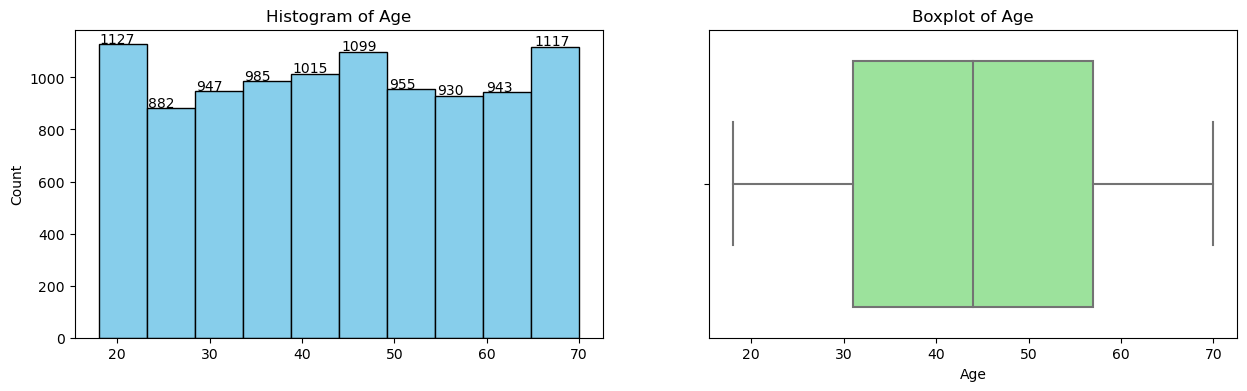

Number_of_Dependents
Skew : -0.02


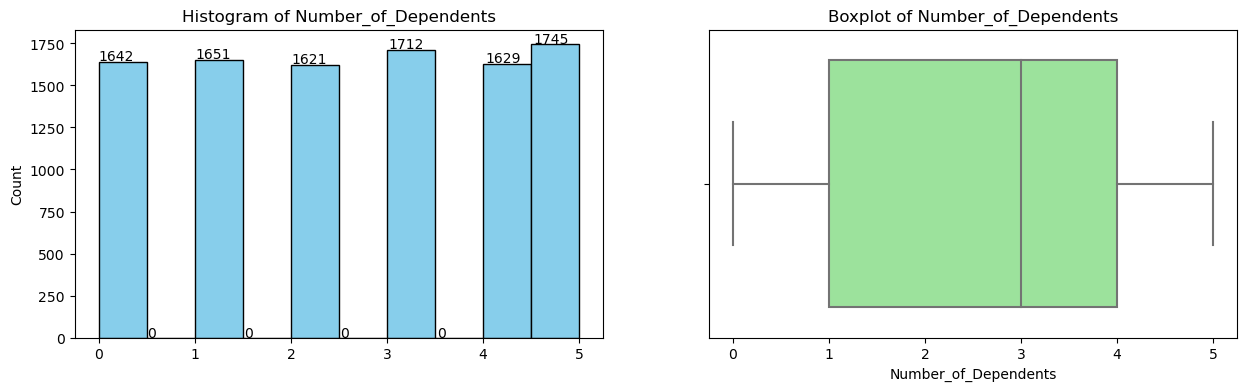

Work_Experience
Skew : -0.0


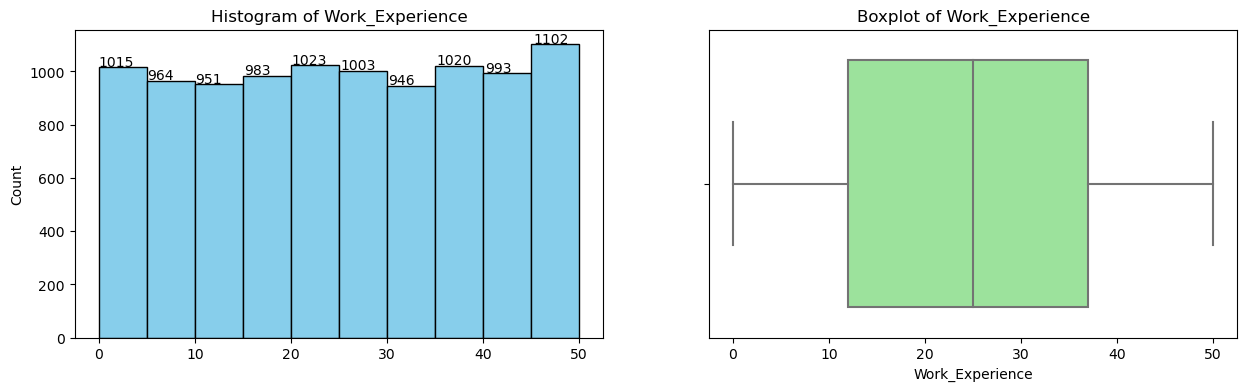

Household_Size
Skew : 0.0


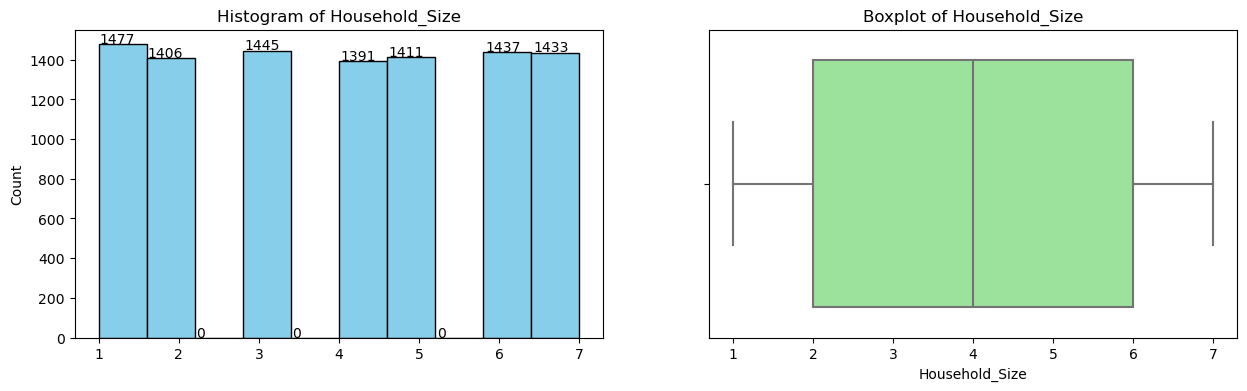

Income
Skew : 2.98


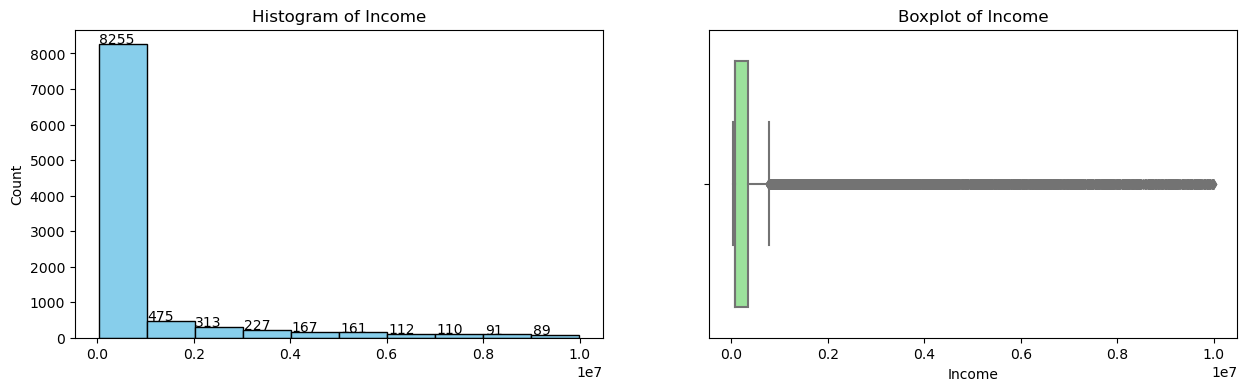

In [92]:
for hcol in num_household:
    print(hcol)
    print('Skew :', round(household_income[hcol].skew(), 2))
    
    # Set figure size
    plt.figure(figsize=(15, 4))
    
    # First subplot for Histogram
    plt.subplot(1, 2, 1)
    ax = household_income[hcol].hist(grid=False, color='skyblue', edgecolor='black')
    plt.ylabel('Count')
    plt.title(f'Histogram of {hcol}')
    
    
    for p in ax.patches:
        plt.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

    # Second subplot for Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=household_income[hcol], color='lightgreen')
    plt.title(f'Boxplot of {hcol}')
    
    # Display and save the image as png for the plots
    plt.savefig(f'{hcol}_distribution.png', dpi=300, bbox_inches='tight') 
    plt.show()
   


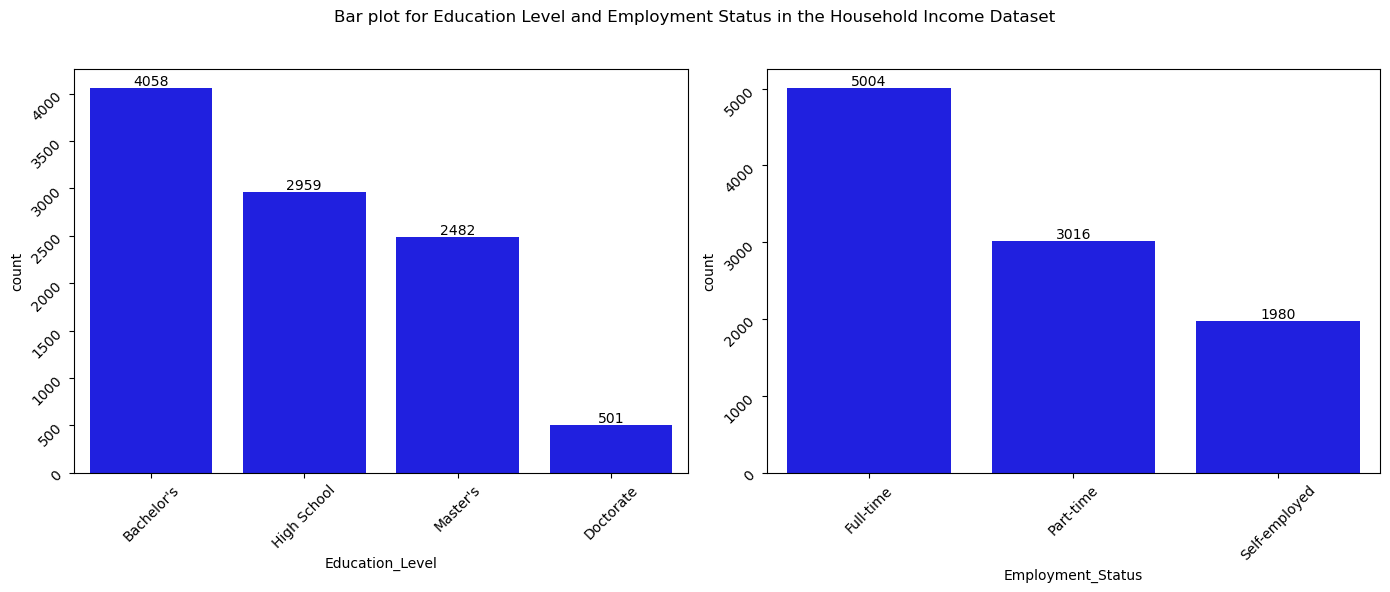

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row and 2 columns
fig.suptitle('Bar plot for Education Level and Employment Status in the Household Income Dataset')

# Plotting categorical variables
sns.countplot(ax=axes[0], x='Education_Level', data=household_income, color='blue', 
              order=household_income['Education_Level'].value_counts().index)
sns.countplot(ax=axes[1], x='Employment_Status', data=household_income, color='blue', 
              order=household_income['Employment_Status'].value_counts().index)

# Adding count labels to the Education Level plot
for p in axes[0].patches:
    axes[0].annotate(str(int(p.get_height())), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Adding count labels to the Employment Status plot
for p in axes[1].patches:
    axes[1].annotate(str(int(p.get_height())), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Rotate the x-tick labels for better visibility
axes[0].tick_params(labelrotation=45)
axes[1].tick_params(labelrotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust title position
plt.show()



### Average Income by Employment Status

In [62]:
income_employment_status = household_income.groupby(['Employment_Status'])['Income'].mean().reset_index().sort_values(by = 'Income', ascending=False)

income_employment_status

,Employment_Status,Income
1,Part-time,905303.193966
0,Full-time,780894.959432
2,Self-employed,772923.665152


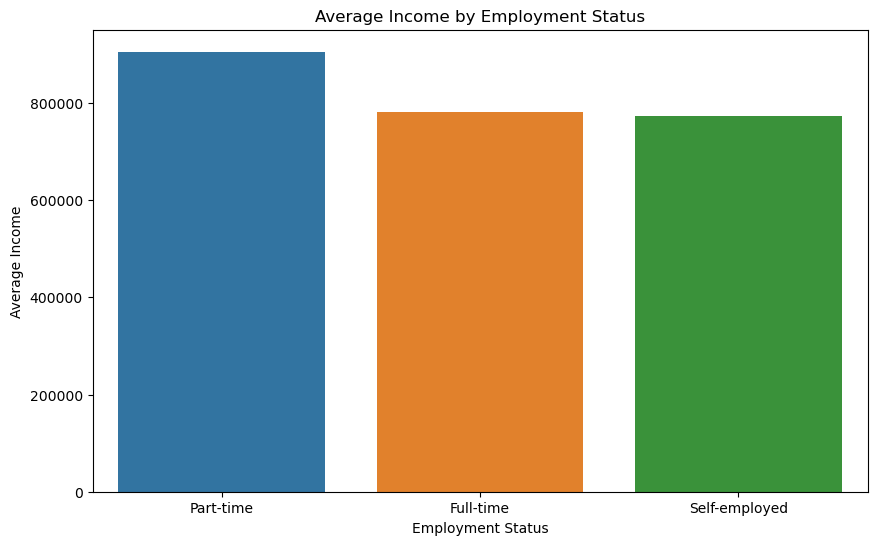

In [64]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Employment_Status', y='Income', data=income_employment_status, ci=None)

plt.title('Average Income by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Average Income')

plt.show()

### Average Income by Education Level

In [67]:
income_education_level = household_income.groupby(['Education_Level'])['Income'].mean().reset_index().sort_values(by = 'Income', ascending=False)

income_education_level

,Education_Level,Income
2,High School,868667.401487
0,Bachelor's,812335.910793
3,Master's,800383.425866
1,Doctorate,628710.652695


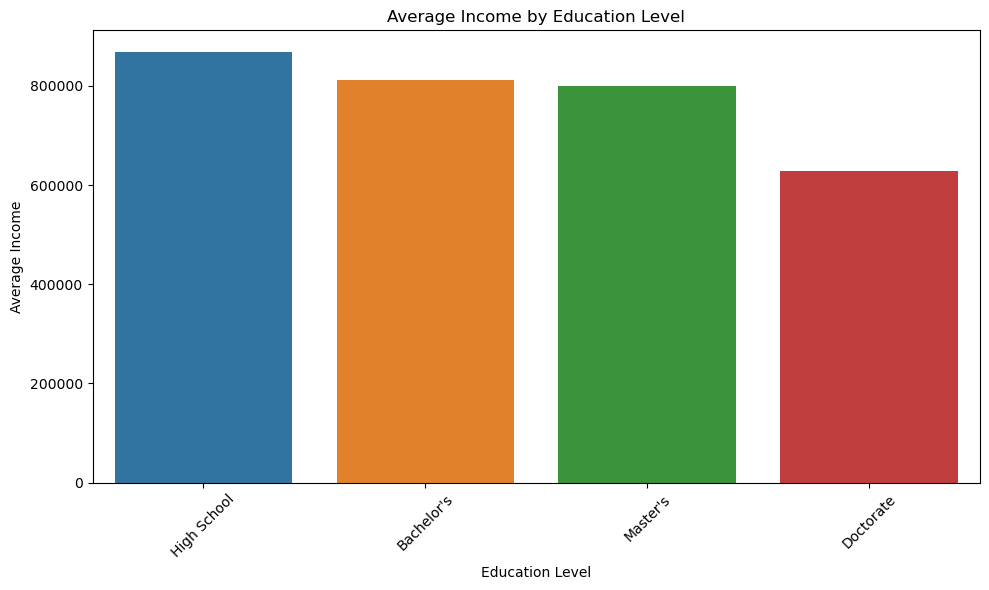

In [74]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Education_Level', y='Income', data=income_education_level, ci=None)


plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')


plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Numerical Fetures Correlation Plot

In [23]:
numerical_feat=['Age','Number_of_Dependents','Work_Experience','Household_Size','Income']
num_hou = household_income[numerical_feat]

In [24]:
correlation_matrix = num_hou.corr()
print(correlation_matrix)

                           Age  Number_of_Dependents  Work_Experience  \
Age                   1.000000              0.001181         0.000310   
Number_of_Dependents  0.001181              1.000000        -0.000708   
Work_Experience       0.000310             -0.000708         1.000000   
Household_Size        0.010565             -0.006419         0.006007   
Income                0.008739              0.011413        -0.027541   

                      Household_Size    Income  
Age                         0.010565  0.008739  
Number_of_Dependents       -0.006419  0.011413  
Work_Experience             0.006007 -0.027541  
Household_Size              1.000000 -0.011356  
Income                     -0.011356  1.000000  


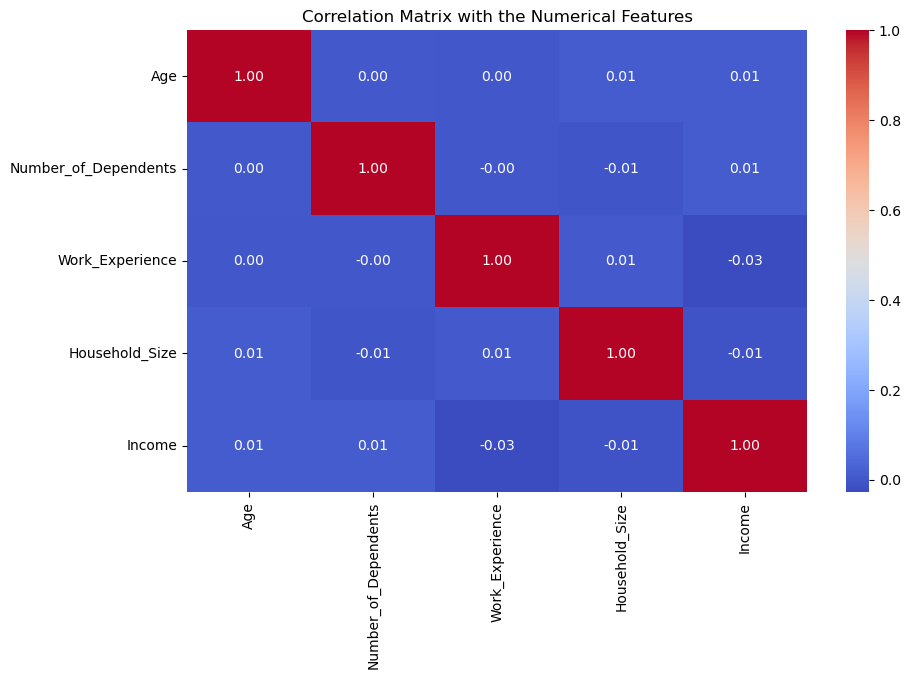

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with the Numerical Features')
plt.show()

## Categorical Features Correlation Matrix

In [26]:
categorical_feat=['Education_Level','Employment_Status']
cat_hou = household_income[categorical_feat]

In [27]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Create a DataFrame to hold Cramér's V results
cramers_v_matrix = pd.DataFrame(index=categorical_feat, columns=categorical_feat)

for i in categorical_feat:
    for j in categorical_feat:
        if i == j:
            cramers_v_matrix.loc[i, j] = 1.0  # Cramér's V with itself is always 1
        else:
            cramers_v_matrix.loc[i, j] = cramers_v(household_income[i], household_income[j])

# Convert the matrix to numeric
cramers_v_matrix = cramers_v_matrix.astype(float)

In [28]:
correl_matrix = cramers_v_matrix.corr()
print(correl_matrix)

                   Education_Level  Employment_Status
Education_Level                1.0               -1.0
Employment_Status             -1.0                1.0


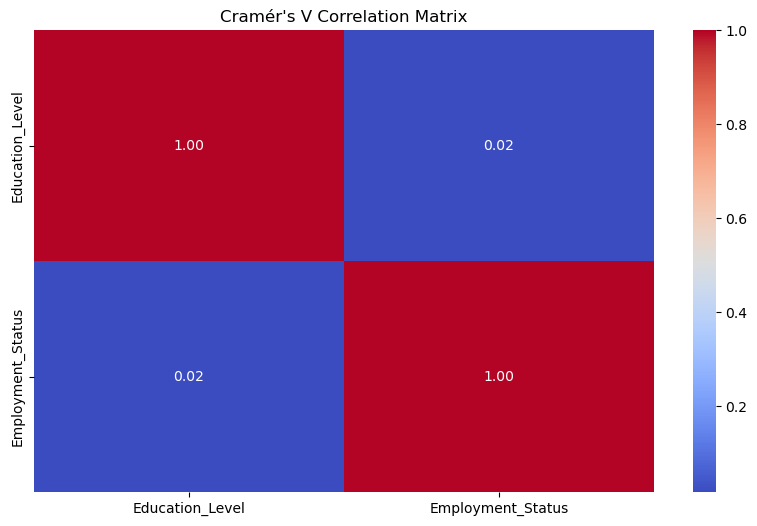

In [29]:
# Plot the Cramér's V heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramér's V Correlation Matrix")
plt.show()

# Feature Transformation

In [30]:
numerical_ft=['Income','Age','Number_of_Dependents','Work_Experience','Household_Size']
num_hous = household_income[numerical_ft]

In [31]:
num_hous['Income'] = np.log(num_hous['Income'] + 1)

C:\Users\Sophi\AppData\Local\Temp\ipykernel_28216\4218164752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_hous['Income'] = np.log(num_hous['Income'] + 1)


In [32]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(output_distribution='normal')
num_transformed = transformer.fit_transform(num_hous)

In [33]:
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(household_income[['Employment_Status']])

In [34]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['High School', "Bachelor's", "Master's", 'Doctorate']])

household_income['Education_Level_Encoded'] = ordinal_encoder.fit_transform(household_income[['Education_Level']])


In [35]:
num_transformed_df = pd.DataFrame(num_transformed, columns=[f'Poly_Feature{i+1}' for i in range(num_transformed.shape[1])])
encoded_features_df = pd.DataFrame(encoded_features, columns=[f'Employment_Status{i+1}' for i in range(encoded_features.shape[1])])

In [36]:
house_combined = pd.concat([household_income, num_transformed_df, encoded_features_df], axis=1)

house_combined.drop(columns=['Education_Level','Employment_Status','Work_Experience'], inplace=True)

print(house_combined.head())

   Age  Number_of_Dependents  Household_Size  Income  Education_Level_Encoded  \
0   56                     5               7   72510                      2.0   
1   69                     0               7   75462                      0.0   
2   46                     1               7   71748                      1.0   
3   32                     2               1   74520                      0.0   
4   60                     3               4  640210                      1.0   

   Poly_Feature1  Poly_Feature2  Poly_Feature3  Poly_Feature4  Poly_Feature5  \
0      -0.060925       0.608973       5.199338      -0.194422       5.199338   
1       0.360172       1.926403      -5.199338      -1.331018       5.199338   
2      -0.168018       0.105580      -0.684763      -1.887753       5.199338   
3       0.215708      -0.621099      -0.226489       0.357496      -5.199338   
4       0.820192       0.849874       0.193143      -0.514923       0.006273   

   Employment_Status1  Employmen

# Cross Validation, Hypertuning  and Comparing Regression Model 

In [37]:
X = house_combined.drop('Income',axis=1)
y = house_combined['Income']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
#Multiple Linear Regression 
linear_model = LinearRegression()

#Perform cross-validation 
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

#Fit the model
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

#Metric for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [78]:
param_grid = {
    'degree': [1, 2, 3, 4],
}

In [82]:
#Polynomial Regresssion
poly_features = PolynomialFeatures(degree=2)  
X_poly_train = poly_features.fit_transform(X_train)  
X_poly_test = poly_features.transform(X_test)       

# Fit the model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_poly_test)

# Cross-validation (fixing the variable name)
cv_scores_poly = cross_val_score(poly_model, X_poly_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [47]:
# Define parameter grid for GridSearchCV K-Nearest Neighbors Regression 
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [48]:
#K-Nearest Neighbors Regression 
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Perform GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)

# Get the best model from grid search
best_knn_model = grid_search_knn.best_estimator_

# Make predictions using the best model
y_pred_knn_best = best_knn_model.predict(X_test)


# Metrics for KNN Regression
mse_knn = mean_squared_error(y_test, y_pred_knn_best)
r2_knn = r2_score(y_test, y_pred_knn_best)


Best KNN Model Parameters: {'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}


In [50]:
# Define parameter grid for GridSearchCV Lasso Regression
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Adjust this range as needed
}

In [52]:
#Lasso Regression
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Perform GridSearchCV
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_lasso_model = grid_search_lasso.best_estimator_

# Make predictions using the best model
y_pred_lasso_best = best_lasso_model.predict(X_test)


# Metrics for Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


C:\Users\Sophi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.838e+14, tolerance: 2.685e+12
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sophi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.383e+14, tolerance: 2.128e+12
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sophi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.372e+14, toleranc

Best Lasso Model Parameters: {'alpha': 100}


C:\Users\Sophi\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [83]:
# Define parameter grid for GridSearchCV Decision Tree Regressor
param_grid_dtr = {
    'max_depth': [None, 5, 10, 15, 20],   
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4]         
}

In [84]:
#Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid_dtr, cv=5, scoring='neg_mean_squared_error')
grid_search_dtr.fit(X_train, y_train)

# Get the best model from grid search
best_dtr_model = grid_search_dtr.best_estimator_

# Make predictions using the best model
y_pred_dtr_best = best_dtr_model.predict(X_test)

# Cross-validation for the best Decision Tree model
cv_scores_best_dtr = cross_val_score(best_dtr_model, X_train, y_train, cv=5, scoring='r2')

# Evaluate the best Decision Tree Regressor
mse_dtr_best = mean_squared_error(y_test, y_pred_dtr_best)
r2_dtr_best = r2_score(y_test, y_pred_dtr_best)

In [54]:
#Random Forest Regressor
rfr = RandomForestRegressor(random_state=42, n_estimators=100)

#Fit the Random Forest Model on the training data
rfr.fit(X_train,y_train)

#Make predictions on the test set
y_pred_rfr = rfr.predict(X_test)

# Cross-validation for Random Forest Regressor
cv_scores_rfr = cross_val_score(rfr, X, y, cv=5, scoring='r2')  # 5-fold cross-validation

#Evaluate Random Forest Regressor
mse_rfr = mean_squared_error(y_test,y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

In [85]:
# Display results
results = pd.DataFrame({
    'Model': [' Multiple Linear Regression','Polynomial Regression','KNN Regression','Lasso Regression','Decision Tree Regressor','Random Forest Regressor'],
    'MSE': [mse_linear, mse_poly, mse_knn, mse_lasso, mse_dtr,mse_rfr],
    'R-squared': [r2_linear,r2_poly, r2_knn, r2_lasso, r2_dtr, r2_rfr]
})

print(results)

                         Model           MSE  R-squared
0   Multiple Linear Regression  1.661760e+12   0.473270
1        Polynomial Regression  5.471466e+11   0.826570
2               KNN Regression  1.702720e+12   0.460287
3             Lasso Regression  1.661760e+12   0.473270
4      Decision Tree Regressor  2.757114e+07   0.999991
5      Random Forest Regressor  1.291019e+07   0.999996


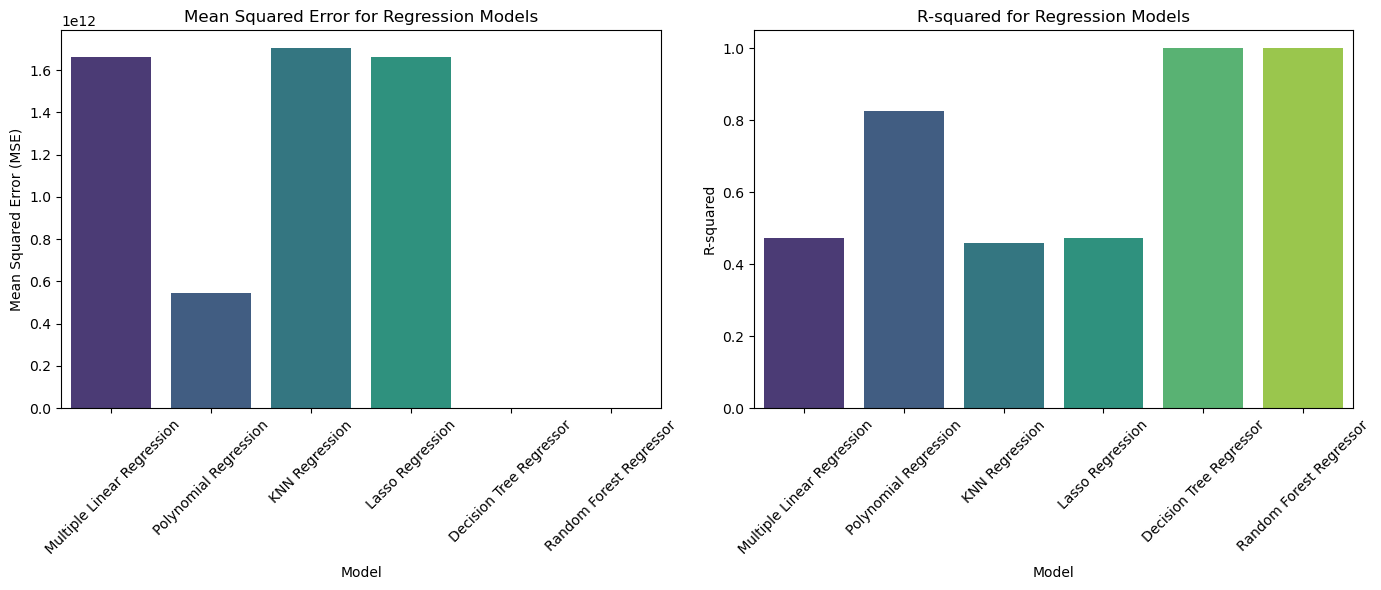

In [89]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Plotting MSE
plt.subplot(1, 2, 1)
sns.barplot(data=results, x='Model', y='MSE', palette='viridis')
plt.title('Mean Squared Error for Regression Models')
plt.xticks(rotation=45)
plt.ylabel('Mean Squared Error (MSE)')

# Plotting R-Squared
plt.subplot(1, 2, 2)
sns.barplot(data=results, x='Model', y='R-squared', palette='viridis')
plt.title('R-squared for Regression Models')
plt.xticks(rotation=45)
plt.ylabel('R-squared')

# Show the plot
plt.tight_layout()
plt.show()

## Summary of Model Selection
* The Multiple Linear Regression has high  mean square error (MSE) of 1.661760e+12, which is the predictions are far from the actual income values. The R-squared is 0.47 or 47% which show a weak performance and low variance in income. 

* The Polynomial Regression model show a low MSE  which is  5.471466e+11 compared to multiple linear resgression, which indicate a better performance in predictive accuracy. The R2 values is 0.83 or 83% in variance, which highlight the relationships in the data,epscially of the relationship between the features and the target. 

* The KNN Regression model has a similar situation to multiple linear regression with high MSE of 1.702720e+12, which indicate a poor predictive performance. The R2 value is 0.46 or 46% of variance, which show weak performance and the lowest varaince overall in the regression model.

* The Lasso Regression performs indetically to the multiple linear regression in terms of MSE and R2. The MSE is 1.661760e+12  and R2 is 0.47 or 47%. The model performance in Lasso did not improve with regulariztion technique with cross-vaildation and hypertuning. 

* The Decision Tree Regressor demonstrates exceptional performance, with a low MSE of   2.757114e+07 and R2 value equal to 1. This indicattes suggesting the fits the training data extremely well. However, the high score may show in concerns about overfitting. 

* The Random Forest Regressor performance similar to decision treee regressor of outstanding performance with lower MSE of 1.291019e+07  and a very high R2 value that is almost to the value to 1.

# Selected Model and Conclusion
* The models  polynomial regression, decision tree, and random forest models demonstrate superior performance in prediciting household income. The polynomial regression mdeol shows the best balance of predictive accuracy among the regression models. The decision tree and random forest models did show their impressive R2 scores, need further vaildation to ensure the performance on the data is consistent and reliable. 

* Overall, the analysis demonstraties that household income can be effeclty predicted using apporiapte pre-processing, feature transformation, and choosing the best fit model for the dataset.The polynomial regression and ensemble methods like random forests proved to be the most reliable, providing strong predictive power and potentially offering valuable insights to understand the factors that influence household income. 

# Citation
* https://medium.com/@kaushalgupta198/exploratory-data-analysis-and-regression-8cc50c9bf51a
* https://www.kaggle.com/datasets/stealthtechnologies/regression-dataset-for-household-income-analysis/data
* https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/
* https://www.geeksforgeeks.org/gradient-boosting-vs-random-forest/
* https://scikit-learn.org/stable/modules/cross_validation.html
* https://www.analyticsvidhya.com/blog/2021/05/feature-transformations-in-data-science-a-detailed-walkthrough/
* https://mcdc.missouri.edu/help/measures-of-income/